<a href="https://colab.research.google.com/github/OnePassio/CE888/blob/master/Lab7/Lab7_Exercise_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import layers
from keras import models
# ignore warning message
import warnings
warnings.filterwarnings('ignore')

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [0]:
#test activation test
activation_test="sigmoid"

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=activation_test, input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=activation_test))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=activation_test))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [44]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=activation_test))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

#try other activation

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

### Training the convnet on MNIST images

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### compile and fit model 

In [47]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 45s 943us/step - loss: 1.0192 - acc: 0.6658 - val_loss: 0.2617 - val_acc: 0.9262
Epoch 2/5
48000/48000 [==============================] - 44s 923us/step - loss: 0.1983 - acc: 0.9416 - val_loss: 0.1381 - val_acc: 0.9585
Epoch 3/5
48000/48000 [==============================] - 44s 919us/step - loss: 0.1152 - acc: 0.9646 - val_loss: 0.0912 - val_acc: 0.9716
Epoch 4/5
48000/48000 [==============================] - 44s 919us/step - loss: 0.0851 - acc: 0.9742 - val_loss: 0.0677 - val_acc: 0.9803
Epoch 5/5
48000/48000 [==============================] - 44s 916us/step - loss: 0.0687 - acc: 0.9784 - val_loss: 0.0772 - val_acc: 0.9768


#### evaluate model

In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 301us/step


0.9781

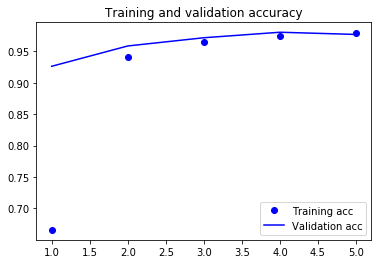

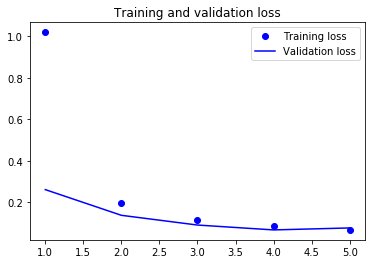

In [49]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

** Exercise:  **

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance.

In [0]:
activation_test="elu" # restart

##Result with activation_test="elu"
Train on 48000 samples, validate on 12000 samples
# 
Epoch 1/5
48000/48000 [==============================] - 52s 1ms/step - loss: 0.1858 - acc: 0.9426 - val_loss: 0.0729 - val_acc: 0.9800
Epoch 2/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0689 - acc: 0.9807 - val_loss: 0.0640 - val_acc: 0.9842
Epoch 3/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0533 - acc: 0.9858 - val_loss: 0.0739 - val_acc: 0.9830
Epoch 4/5
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0444 - acc: 0.9886 - val_loss: 0.0663 - val_acc: 0.9865
Epoch 5/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0399 - acc: 0.9904 - val_loss: 0.0620 - val_acc: 0.9894
# 
test_acc=0.9902

##Result with activation_test="relu"
Train on 48000 samples, validate on 12000 samples
# 
Epoch 1/5
48000/48000 [==============================] - 45s 937us/step - loss: 0.2383 - acc: 0.9262 - val_loss: 0.1050 - val_acc: 0.9722
Epoch 2/5
48000/48000 [==============================] - 45s 933us/step - loss: 0.0794 - acc: 0.9771 - val_loss: 0.0707 - val_acc: 0.9830
Epoch 3/5
48000/48000 [==============================] - 45s 938us/step - loss: 0.0643 - acc: 0.9830 - val_loss: 0.0688 - val_acc: 0.9825
Epoch 4/5
48000/48000 [==============================] - 45s 936us/step - loss: 0.0514 - acc: 0.9869 - val_loss: 0.0719 - val_acc: 0.9839
Epoch 5/5
48000/48000 [==============================] - 45s 941us/step - loss: 0.0433 - acc: 0.9889 - val_loss: 0.0605 - val_acc: 0.9875
# 
test_acc= 0.9893

##Result with activation_test="tanh"
Train on 48000 samples, validate on 12000 samples
# 
Epoch 1/5
48000/48000 [==============================] - 45s 942us/step - loss: 0.1689 - acc: 0.9499 - val_loss: 0.0742 - val_acc: 0.9788
Epoch 2/5
48000/48000 [==============================] - 45s 937us/step - loss: 0.0527 - acc: 0.9842 - val_loss: 0.0444 - val_acc: 0.9867
Epoch 3/5
48000/48000 [==============================] - 45s 940us/step - loss: 0.0354 - acc: 0.9890 - val_loss: 0.0481 - val_acc: 0.9868
Epoch 4/5
48000/48000 [==============================] - 46s 962us/step - loss: 0.0254 - acc: 0.9924 - val_loss: 0.0472 - val_acc: 0.9868
Epoch 5/5
48000/48000 [==============================] - 46s 965us/step - loss: 0.0184 - acc: 0.9943 - val_loss: 0.0442 - val_acc: 0.9880
# 
test_acc=0.9895

##Result with activation_test="sigmoid"
Train on 48000 samples, validate on 12000 samples
# 
Epoch 1/5
48000/48000 [==============================] - 45s 943us/step - loss: 1.0192 - acc: 0.6658 - val_loss: 0.2617 - val_acc: 0.9262
Epoch 2/5
48000/48000 [==============================] - 44s 923us/step - loss: 0.1983 - acc: 0.9416 - val_loss: 0.1381 - val_acc: 0.9585
Epoch 3/5
48000/48000 [==============================] - 44s 919us/step - loss: 0.1152 - acc: 0.9646 - val_loss: 0.0912 - val_acc: 0.9716
Epoch 4/5
48000/48000 [==============================] - 44s 919us/step - loss: 0.0851 - acc: 0.9742 - val_loss: 0.0677 - val_acc: 0.9803
Epoch 5/5
48000/48000 [==============================] - 44s 916us/step - loss: 0.0687 - acc: 0.9784 - val_loss: 0.0772 - val_acc: 0.9768
# 
test_acc=0.9781